In [14]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

### A Brief Introduction to our Data

Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.
The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.
Thus, our Goal with this Machine Learning project is to evaluate what is the best solution to evaluate which clients will be rejected for loans. 

All the data used on the follwing project is stored in 8 different dataframes:

    1.  application_test_df : main table,  test sample: Infos about loans and loan applicants
    
    2.  application_train_df: main table,  train sample: Infos about loans and loan applicants
    
    3.  bureau_df: Application data from previous loans that client got from other institutions
    
    4.  bureau_balance_df: Monthly balance of credits in credit bureau
    
    5.  credit_card_balance_df: Monthly balance of client's previous credit card loans in Home Credit;
    
    6.  installments_payments_df: past payments data for each installments of previous credits in Home Credit related to loans in our sample;
    
    7.  POS_CASH_balance_df: Monthly balance of clients previous loans in Home Credit
    
    8.  previous_application_df: Application Data of client's previous loans in Home Credit

In [2]:
application_test_df = pd.read_csv('../Datasets/application_test.csv')
application_train_df = pd.read_csv('../Datasets/application_train.csv')
bureau_df = pd.read_csv('../Datasets/bureau.csv')
bureau_balance_df = pd.read_csv('../Datasets/bureau_balance.csv')
credit_card_balance_df = pd.read_csv('../Datasets/credit_card_balance.csv')
#HomeCredit_columns_description = pd.read_csv('../Datasets/HomeCredit_columns_description.csv')
installments_payments_df = pd.read_csv('../Datasets/installments_payments.csv')
POS_CASH_balance_df = pd.read_csv('../Datasets/POS_CASH_balance.csv')
previous_application_df = pd.read_csv('../Datasets/previous_application.csv')

## application_test_df Analysis

In [10]:
application_test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print('Size of application_test_df data', application_test_df.shape)

Size of application_test_df data (48744, 121)


In [12]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 


missing_data(application_test_df).head(10)


,Total,Percent
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302


## application_train_df Analysis

In [13]:
application_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
print('Size of application_train_df data', application_train_df.shape)

Size of application_train_df data (307511, 122)


In [15]:
missing_data(application_train_df).head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


## bureau_df Analysis

In [16]:
bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [17]:
print('Size of bureau_df data', bureau_df.shape)

Size of bureau_df data (1716428, 17)


In [18]:
missing_data(bureau_df).head(10)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


## bureau_balance_df Analysis

In [19]:
bureau_balance_df.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [20]:
print('Size of bureau_balance_df data', bureau_balance_df.shape)

Size of bureau_balance_df data (27299925, 3)


In [21]:
missing_data(bureau_balance_df).head(10)

,Total,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


## credit_card_balance_df Analysis

In [22]:
credit_card_balance_df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [23]:
print('Size of credit_card_balance_df data', credit_card_balance_df.shape)

Size of credit_card_balance_df data (3840312, 23)


In [24]:
missing_data(credit_card_balance_df).head(10)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_ID_PREV,0,0.000000


## installments_payments_df Analysis

In [25]:
installments_payments_df.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [26]:
print('Size of installments_payments_df data', installments_payments_df.shape)

Size of installments_payments_df data (13605401, 8)


In [27]:
missing_data(installments_payments_df).head(10)

,Total,Percent
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
DAYS_INSTALMENT,0,0.000000
AMT_INSTALMENT,0,0.000000


## POS_CASH_balance_df Analysis

In [28]:
POS_CASH_balance_df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [29]:
print('Size of POS_CASH_balance_df data', POS_CASH_balance_df.shape)

Size of POS_CASH_balance_df data (10001358, 8)


In [30]:
missing_data(POS_CASH_balance_df).head(10)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
MONTHS_BALANCE,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000


## previous_application_df Analysis

In [31]:
previous_application_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
print('Size of previous_application_df data', previous_application_df.shape)

Size of previous_application_df data (1670214, 37)


In [33]:
missing_data(previous_application_df).head(10)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


## A brief introduction the the House Credit Data

### Data Curation

After some experiments on the data, our group have spoted two columns with very important data that were not being presented the most efficient way: 
- DAYS_EMPLOYED: All collumns with error return a default value of 365243. We are thus replacing all the rows with this value by NaN values, anda create another collumn called "YEARS_EMPLOYED" that corresponds to the DAYS_EMPLOYED (already corrected), multiplied by -1 and devided by 365.
- DAYS_BIRTH: The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. We are going to create a new column called "CLIENT_AGE" which corresponds to the positive number of DAYS_BIRTH, devided by 365.


In [38]:
application_train_df['CLIENT_AGE'] = application_train_df['DAYS_BIRTH'] / -365

application_train_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

application_train_df['YEARS_EMPLOYED'] = application_train_df['DAYS_EMPLOYED'] / -365

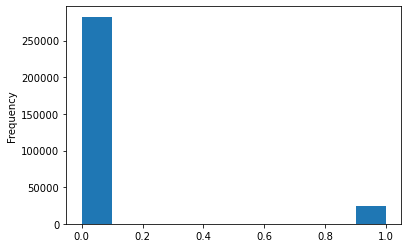

In [5]:
#Examine the distribution of the target Variables
# 0 means the loan was grated while 1 means the loan wasnt granted
# Since the trainf_df has more records, we will use this one for eda purposes

application_train_df['TARGET'].astype(int).plot.hist();

As we can see, there are far more loans which get repaid, than the ones that dont. This representnts an impabalance proble since the diference between true positives and true negatives is very large. Therefore, it might be complicated to evaluate any machine learning applied on this data

In [42]:
# Finding the best correlations
train_df_correlations = application_train_df.corr()['TARGET'].sort_values(ascending= True)

print('Best Correlations with target variable are:\n', train_df_correlations.tail(7))
print('\nWorst Correlations with target variable are:\n', train_df_correlations.head(7))

Best Correlations with target variable are:
 DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Worst Correlations with target variable are:
 EXT_SOURCE_3     -0.178919
EXT_SOURCE_2     -0.160472
EXT_SOURCE_1     -0.155317
CLIENT_AGE       -0.078239
YEARS_EMPLOYED   -0.074958
FLOORSMAX_AVG    -0.044003
FLOORSMAX_MEDI   -0.043768
Name: TARGET, dtype: float64


As we can see, the DAYS_EMPLOYED and DAYS_BIRTH are the ones with strngest correlations with our target variable. Lets analyze these two more carfully...

Regarding Home Credit loan records, how is the age of the client distributed?

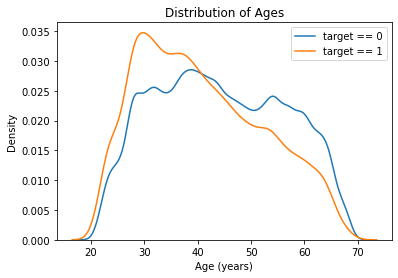

In [48]:
sns.kdeplot(application_train_df.loc[application_train_df['TARGET'] == 0, 'CLIENT_AGE'] , label = 'target == 0')
sns.kdeplot(application_train_df.loc[application_train_df['TARGET'] == 1, 'CLIENT_AGE'] , label = 'target == 1')
plt.legend()
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

Hum... Intresting! It looks like the older a clients gets, the bigger the probability of missing a loan repayment gets! Although there aint no clear pattern on the repaied loans line, we can infere this conclusion by simply looking at the non repaid loans line and spot that the majority of non repaid loans are the ones conceded to clients between 20 and 40 years old.
What about the relation between the years of emplyment of a clients, and their capacity to repay their loans?

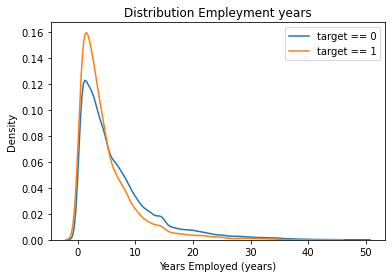

In [50]:
sns.kdeplot(application_train_df.loc[application_train_df['TARGET'] == 0, 'YEARS_EMPLOYED'] , label = 'target == 0')
sns.kdeplot(application_train_df.loc[application_train_df['TARGET'] == 1, 'YEARS_EMPLOYED'] , label = 'target == 1')
plt.legend()
plt.xlabel('Years Employed (years)'); plt.ylabel('Density'); plt.title('Distribution Empleyment years');

Some key insights:
1. From our Home Credit records, people with 0 to 5 years of employment are the ones who tend to apply more for loans! About this fact we can safly say that aquiring a house is the the first priority for those who find a stable job (at least 3 years of employment);

2. Another key insight is the fact that both max values for repaid an non repaid loans are assign to clients that have between around 3 years of employment;

About the two most correlated variables, We have seen that there is a strong relation between them and our target variable. What about other variables that, at a fisrt sight, look intresting too? For example, what about the amount of the loan? does that have any influence on our target varaible?

Relation between target variable and AMT_CREDIT (amount of the Loan)

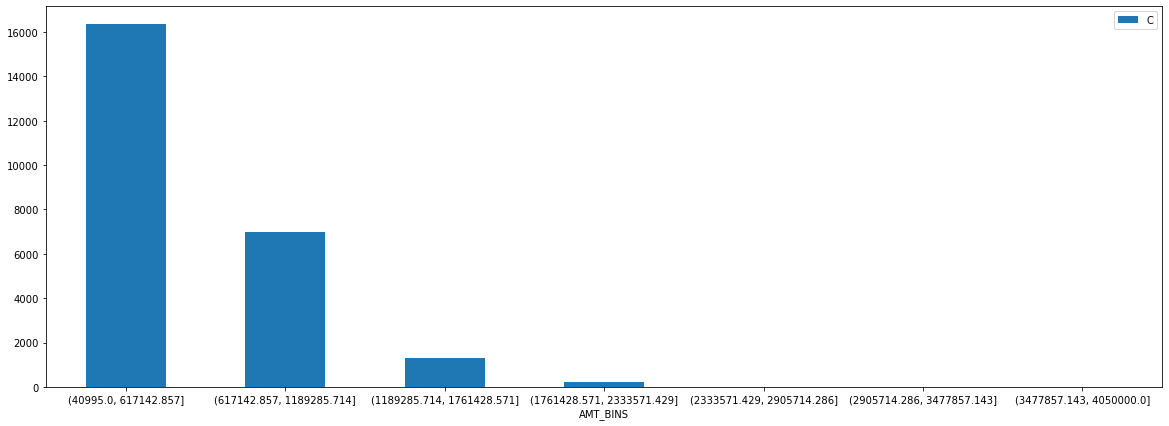

In [13]:
#Distribution of AMT_CREDIT
loan_amount_bins = pd.DataFrame()
loan_amount_bins['AMT_BINS'] = pd.cut(application_train_df['AMT_CREDIT'], bins = 7)
loan_amount_bins['TARGET'] = application_train_df['TARGET']



loan_amount_bins.groupby('AMT_BINS').sum().plot.bar(figsize = (20,7), rot = 0).legend('Count')


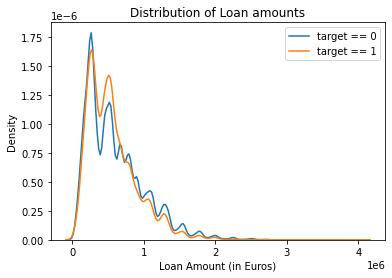

In [6]:
#Relation between AMT_CREDIT (Aamount of loan) and target varaible
sns.kdeplot(application_train_df.loc[application_train_df['TARGET'] == 0, 'AMT_CREDIT'] , label = 'target == 0')
sns.kdeplot(application_train_df.loc[application_train_df['TARGET'] == 1, 'AMT_CREDIT'] , label = 'target == 1')
plt.legend()
plt.xlabel('Loan Amount (in Euros)'); plt.ylabel('Density'); plt.title('Distribution of Loan amounts');
